In [ ]:
!pip install pydataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 25.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939415 sha256=ca3f89b71627d17a151eb5513703f55ee1a4772d7dede333cd92e9c614457971
  Stored in directory: /root/.cache/pip/wheels/4c/82/ad/f04abc617222b10438b1285ab9b5cfaecd180c10a7c81cff54
Successfully built pydataset


In [ ]:
import  numpy as np
import pandas as pd
from pydataset import data
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

initiated datasets repo at: /root/.pydataset/


In [ ]:
df=pd.DataFrame(data('titanic'))
df.head()

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes


In [ ]:
df.duplicated()

,0
1,False
2,True
3,True
4,True
5,True
...,...
1312,True
1313,True
1314,True
1315,True


In [ ]:
df=df.drop_duplicates()

In [ ]:
df.isna().sum()

,0
class,0
age,0
sex,0
survived,0


In [ ]:
df.shape

(20, 4)

In [ ]:
df.head()

,class,age,sex,survived
1,1st class,adults,man,yes
58,1st class,adults,man,no
176,1st class,adults,women,yes
316,1st class,adults,women,no
320,1st class,child,man,yes


In [ ]:
df['survived'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['sex'].unique()

array(['man', 'women'], dtype=object)

In [ ]:
df['age'].unique()

array(['adults', 'child'], dtype=object)

In [ ]:
df['survived'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['class'].unique()

array(['1st class', '2nd class', '3rd class'], dtype=object)

In [ ]:
df.columns

Index(['class', 'age', 'sex', 'survived'], dtype='object')

In [ ]:
df.dtypes

,0
class,object
age,object
sex,object
survived,object


In [ ]:
dummy=pd.get_dummies(df['survived']).astype(int)
df=pd.concat([df,dummy],axis=1)
df=df.rename(index=str, columns={"yes":"Surv"})
df=df.drop('no',axis=1)

In [ ]:
df.head()

,class,age,sex,survived,Surv
1,1st class,adults,man,yes,1
58,1st class,adults,man,no,0
176,1st class,adults,women,yes,1
316,1st class,adults,women,no,0
320,1st class,child,man,yes,1


In [ ]:
dummy=pd.get_dummies(df['sex']).astype(int)
df=pd.concat([df,dummy],axis=1)
df=df.rename(index=str, columns={"man":"Men"})
df=df.drop('women',axis=1)

In [ ]:
df.head()

,class,age,sex,survived,Surv,Men
1,1st class,adults,man,yes,1,1
58,1st class,adults,man,no,0,1
176,1st class,adults,women,yes,1,0
316,1st class,adults,women,no,0,0
320,1st class,child,man,yes,1,1


In [ ]:
df=pd.get_dummies(df,columns=['class'])
df.head()

,age,sex,survived,Surv,Men,class_1st class,class_2nd class,class_3rd class
1,adults,man,yes,1,1,True,False,False
58,adults,man,no,0,1,True,False,False
176,adults,women,yes,1,0,True,False,False
316,adults,women,no,0,0,True,False,False
320,child,man,yes,1,1,True,False,False


In [ ]:
df=df.drop(columns=['class_3rd class'])
df.head()

,age,sex,survived,Surv,Men,class_1st class,class_2nd class
1,adults,man,yes,1,1,True,False
58,adults,man,no,0,1,True,False
176,adults,women,yes,1,0,True,False
316,adults,women,no,0,0,True,False
320,child,man,yes,1,1,True,False


In [ ]:
df['class_1st class']=df['class_1st class'].astype(int)
df['class_2nd class']=df['class_2nd class'].astype(int)
df.head()

,age,sex,survived,Surv,Men,class_1st class,class_2nd class
1,adults,man,yes,1,1,1,0
58,adults,man,no,0,1,1,0
176,adults,women,yes,1,0,1,0
316,adults,women,no,0,0,1,0
320,child,man,yes,1,1,1,0


In [ ]:
dummy=pd.get_dummies(df['age']).astype(int)
df=pd.concat([df,dummy],axis=1)
df=df.rename(index=str, columns={"adults":"Adult"})
df=df.drop('child',axis=1)

In [ ]:
df.head()

,age,sex,survived,Surv,Men,class_1st class,class_2nd class,Adult
1,adults,man,yes,1,1,1,0,1
58,adults,man,no,0,1,1,0,1
176,adults,women,yes,1,0,1,0,1
316,adults,women,no,0,0,1,0,1
320,child,man,yes,1,1,1,0,0


In [ ]:
df=df.drop(columns=['age','sex','survived'])

In [ ]:
df.head()

,Surv,Men,class_1st class,class_2nd class,Adult
1,1,1,1,0,1
58,0,1,1,0,1
176,1,0,1,0,1
316,0,0,1,0,1
320,1,1,1,0,0


In [ ]:
X=df.drop(columns=['Surv'])

In [ ]:
y=df['Surv']

In [ ]:
X.columns

Index(['Men', 'class_1st class', 'class_2nd class', 'Adult'], dtype='object')

In [ ]:
X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
# h1=svm.LinearSVC(C=1)
# h1.fit(X_train,y_train)
# h1.score(X_train,y_train)

from sklearn.svm import SVC
h1=SVC(kernel='linear')
h1.fit(X_train,y_train)
h1.score(X_train,y_train)

0.6428571428571429

In [ ]:
h1.support_vectors_

array([[0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.],
       [1., 0., 1., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 1., 1.]])

In [ ]:
y_pred=h1.predict(X_test)
pd.crosstab(y_test,y_pred)

col_0,1
Surv,
0,3
1,3


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      1.00      0.67         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Using entire data to fit in SVC

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

wine = datasets.load_wine()
X = wine.data[:, :2]
y = wine.target

svc = svm.SVC(kernel='linear', C=1.0)
svc.fit(X, y)

SVC(kernel='linear')

In [ ]:
X.shape

(178, 2)

In [ ]:
print(wine.feature_names)


['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [ ]:
support_vectors = svc.support_vectors_

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [ ]:
np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

(array([[10.03, 10.05, 10.07, ..., 15.79, 15.81, 15.83],
        [10.03, 10.05, 10.07, ..., 15.79, 15.81, 15.83],
        [10.03, 10.05, 10.07, ..., 15.79, 15.81, 15.83],
        ...,
        [10.03, 10.05, 10.07, ..., 15.79, 15.81, 15.83],
        [10.03, 10.05, 10.07, ..., 15.79, 15.81, 15.83],
        [10.03, 10.05, 10.07, ..., 15.79, 15.81, 15.83]]),
 array([[-0.26, -0.26, -0.26, ..., -0.26, -0.26, -0.26],
        [-0.24, -0.24, -0.24, ..., -0.24, -0.24, -0.24],
        [-0.22, -0.22, -0.22, ..., -0.22, -0.22, -0.22],
        ...,
        [ 6.74,  6.74,  6.74, ...,  6.74,  6.74,  6.74],
        [ 6.76,  6.76,  6.76, ...,  6.76,  6.76,  6.76],
        [ 6.78,  6.78,  6.78, ...,  6.78,  6.78,  6.78]]))

In [ ]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)

[1 1 1 ... 2 2 2]


In [ ]:
Z = Z.reshape(xx.shape)
print(Z)

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]]


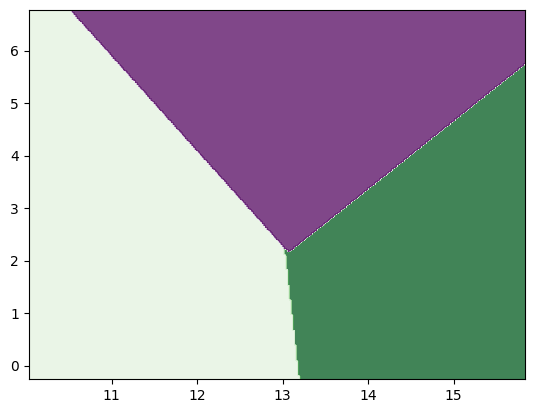

In [ ]:
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn_r, alpha=0.8)

In [ ]:
np.c_[xx.ravel(), yy.ravel()]

array([[10.03, -0.26],
       [10.05, -0.26],
       [10.07, -0.26],
       ...,
       [15.79,  6.78],
       [15.81,  6.78],
       [15.83,  6.78]])

In [ ]:
Z

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2]])

In [ ]:
xx.shape


(353, 291)

In [ ]:
yy.shape

(353, 291)

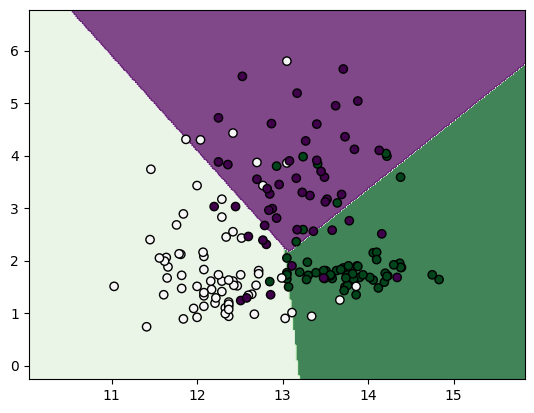

In [ ]:
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn_r, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.PRGn_r, edgecolors='k')

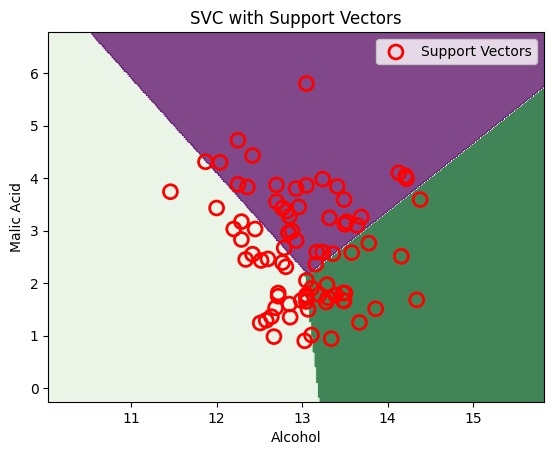

In [ ]:
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn_r, alpha=0.8)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
            facecolors='none', edgecolors='r', linewidths=2, label='Support Vectors')

plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('SVC with Support Vectors')
plt.legend()
plt.show()

In [ ]:
print("Support Vectors:")
print(support_vectors)

Support Vectors:
[[13.2   1.78]
 [13.16  2.36]
 [13.24  2.59]
 [13.64  3.1 ]
 [12.93  3.8 ]
 [12.85  1.6 ]
 [13.5   1.81]
 [13.05  2.05]
 [13.39  1.77]
 [13.3   1.72]
 [13.48  1.81]
 [13.28  1.64]
 [13.05  1.65]
 [13.07  1.5 ]
 [14.22  3.99]
 [13.41  3.84]
 [13.24  3.98]
 [13.05  1.77]
 [14.21  4.04]
 [14.38  3.59]
 [13.05  1.73]
 [13.29  1.97]
 [12.64  1.36]
 [13.67  1.25]
 [13.11  1.01]
 [13.34  0.94]
 [13.86  1.51]
 [13.49  1.66]
 [12.99  1.67]
 [13.03  0.9 ]
 [12.7   3.87]
 [12.72  1.81]
 [13.05  3.86]
 [12.67  0.98]
 [12.69  1.53]
 [12.29  2.83]
 [12.29  3.17]
 [12.34  2.45]
 [12.42  2.55]
 [12.72  1.75]
 [11.46  3.74]
 [12.52  2.43]
 [12.77  3.43]
 [12.    3.43]
 [12.42  4.43]
 [13.05  5.8 ]
 [11.87  4.31]
 [12.04  4.3 ]
 [12.86  1.35]
 [12.88  2.99]
 [12.81  2.31]
 [12.7   3.55]
 [12.51  1.24]
 [12.6   2.46]
 [12.25  4.72]
 [13.49  3.59]
 [12.84  2.96]
 [12.93  2.81]
 [13.36  2.56]
 [13.52  3.17]
 [12.25  3.88]
 [13.32  3.24]
 [13.5   3.12]
 [12.79  2.67]
 [13.11  1.9 ]
 [12.58 

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = svc.predict(X)

acc = accuracy_score(y, y_pred)
print("Accuracy on test set:", acc)

Accuracy on test set: 0.7808988764044944


# Using X_train and y_train to fit in SVC

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

wine = datasets.load_wine()
# Select only the first two features for training to match the visualization
X = wine.data[:,:2]
y = wine.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

svc=svm.SVC(kernel='linear',C=1.0)
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
X_train.shape

(124, 2)

In [ ]:
support_vectors = svc.support_vectors_

x_train_min, x_train_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_train_min, y_train_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_train_min, x_train_max, 0.02),
                     np.arange(y_train_min, y_train_max, 0.02))

In [ ]:
np.meshgrid(np.arange(x_train_min, x_train_max, 0.02),
                     np.arange(y_train_min, y_train_max, 0.02))

(array([[10.03, 10.05, 10.07, ..., 15.79, 15.81, 15.83],
        [10.03, 10.05, 10.07, ..., 15.79, 15.81, 15.83],
        [10.03, 10.05, 10.07, ..., 15.79, 15.81, 15.83],
        ...,
        [10.03, 10.05, 10.07, ..., 15.79, 15.81, 15.83],
        [10.03, 10.05, 10.07, ..., 15.79, 15.81, 15.83],
        [10.03, 10.05, 10.07, ..., 15.79, 15.81, 15.83]]),
 array([[-0.26, -0.26, -0.26, ..., -0.26, -0.26, -0.26],
        [-0.24, -0.24, -0.24, ..., -0.24, -0.24, -0.24],
        [-0.22, -0.22, -0.22, ..., -0.22, -0.22, -0.22],
        ...,
        [ 6.74,  6.74,  6.74, ...,  6.74,  6.74,  6.74],
        [ 6.76,  6.76,  6.76, ...,  6.76,  6.76,  6.76],
        [ 6.78,  6.78,  6.78, ...,  6.78,  6.78,  6.78]]))

In [ ]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)

[1 1 1 ... 2 2 2]


In [ ]:
Z = Z.reshape(xx.shape)
print(Z)

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]]


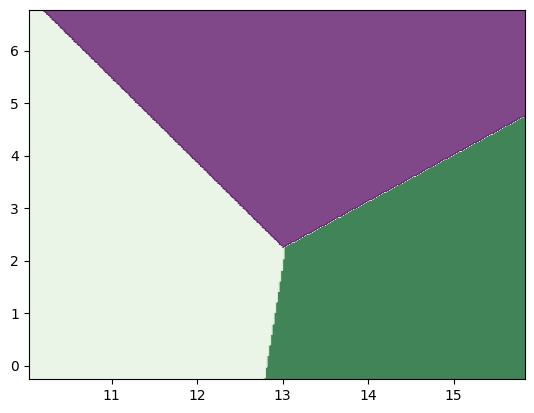

In [ ]:
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn_r, alpha=0.8)

In [ ]:
np.c_[xx.ravel(), yy.ravel()]

array([[10.03, -0.26],
       [10.05, -0.26],
       [10.07, -0.26],
       ...,
       [15.79,  6.78],
       [15.81,  6.78],
       [15.83,  6.78]])

In [ ]:
Z

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2]])

In [ ]:
xx.shape

(353, 291)

In [ ]:
yy.shape

(353, 291)

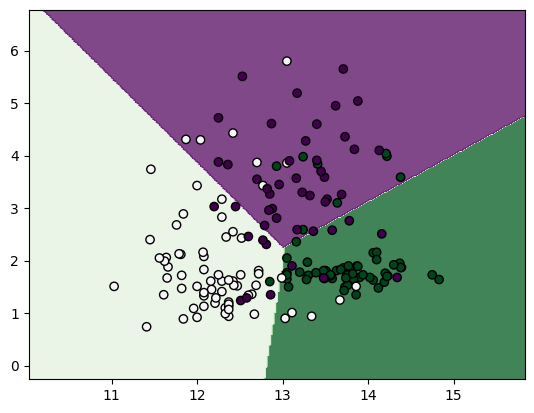

In [ ]:
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn_r, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.PRGn_r, edgecolors='k')

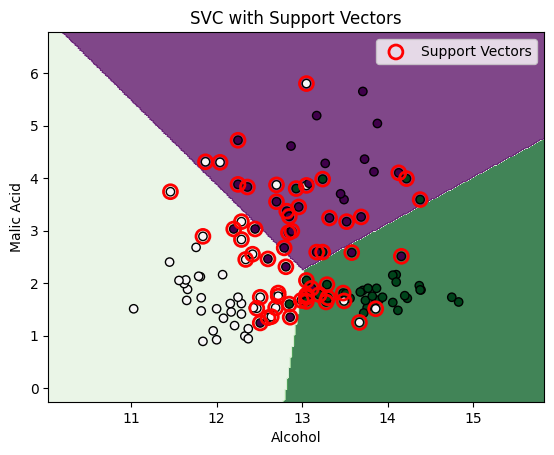

In [ ]:
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn_r, alpha=0.8)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.PRGn_r, edgecolors='k')

support_vectors = svc.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
            facecolors='none', edgecolors='r', linewidths=2, label='Support Vectors')

plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('SVC with Support Vectors')
plt.legend()
plt.show()

In [ ]:
print("Support Vectors:")
print(support_vectors)

Support Vectors:
[[13.28  1.64]
 [13.3   1.72]
 [13.24  2.59]
 [13.05  1.77]
 [13.05  2.05]
 [12.85  1.6 ]
 [14.22  3.99]
 [13.48  1.81]
 [14.38  3.59]
 [13.24  3.98]
 [13.05  1.73]
 [12.93  3.8 ]
 [13.29  1.97]
 [13.05  1.65]
 [13.2   1.78]
 [12.51  1.73]
 [12.29  2.83]
 [12.47  1.52]
 [13.05  5.8 ]
 [12.72  1.81]
 [12.7   3.87]
 [12.6   1.34]
 [12.64  1.36]
 [12.99  1.67]
 [13.67  1.25]
 [12.42  2.55]
 [11.84  2.89]
 [11.87  4.31]
 [11.46  3.74]
 [13.05  3.86]
 [13.49  1.66]
 [12.72  1.75]
 [12.04  4.3 ]
 [12.29  3.17]
 [13.86  1.51]
 [12.69  1.53]
 [12.34  2.45]
 [12.82  3.37]
 [12.25  3.88]
 [12.2   3.03]
 [13.52  3.17]
 [12.81  2.31]
 [12.85  3.27]
 [12.6   2.46]
 [12.7   3.55]
 [12.84  2.96]
 [13.17  2.59]
 [12.36  3.83]
 [12.25  4.72]
 [13.69  3.26]
 [13.11  1.9 ]
 [12.88  2.99]
 [12.51  1.24]
 [13.32  3.24]
 [12.96  3.45]
 [14.16  2.51]
 [12.45  3.03]
 [13.58  2.58]
 [12.86  1.35]
 [12.79  2.67]
 [14.13  4.1 ]]


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = svc.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", acc)

Accuracy on test set: 0.7407407407407407
